In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 分析の概要と目的
data7は車の評価に関するデータである.このデータを用いて主成分分析を行うことを目的とする.

In [4]:
df = pd.read_csv("data7.csv")
df.head()

,No.,価格,燃費,車体重量,排気量,馬力,耐用年数
0,1,8895,33,2560,97,113,12
1,2,7402,33,2345,114,90,8
2,3,6319,37,1845,81,63,12
3,4,6635,32,2260,91,92,13
4,5,6599,32,2440,113,103,13


In [5]:
dft = df.drop(columns={"No."})

# 行列を標準化
dfs = dft.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)

from sklearn.decomposition import PCA
pca =PCA() # インスタンス化
pca.fit(dfs)
feature = pca.transform(dfs) 

### 寄与率

In [6]:
cr = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])
cr

,0
PC1,0.677446
PC2,0.178416
PC3,0.061686
PC4,0.044032
PC5,0.024469
PC6,0.013951


### 累積寄与率

In [7]:
cr.cumsum()

,0
PC1,0.677446
PC2,0.855862
PC3,0.917548
PC4,0.961580
PC5,0.986049
PC6,1.000000


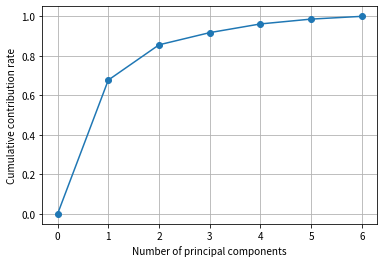

In [8]:
import matplotlib.ticker as ticker
plt.figure(facecolor="white")
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

累積寄与率から第二主成分までで全体の80%の情報を説明できることがわかる.累積寄与率基準から,第一主成分および第二主成分を用いて分析を行う.

### 固有値

In [9]:
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,4.064676
PC2,1.070498
PC3,0.370114
PC4,0.264195
PC5,0.146813
PC6,0.083704


### 固有ベクトル

In [10]:
pd.DataFrame(pca.components_, columns=dfs.columns[0:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,価格,燃費,車体重量,排気量,馬力,耐用年数
PC1,-0.389921,0.442516,-0.471399,-0.445231,-0.447602,0.177047
PC2,0.410816,-0.005808,0.070427,-0.229685,0.134464,0.869138
PC3,-0.582335,0.338422,0.046121,0.488589,0.439747,0.334862
PC4,0.507926,0.725372,-0.164502,0.002152,0.337561,-0.273560
PC5,-0.112957,-0.376285,-0.580528,-0.326196,0.628427,-0.085509
PC6,-0.263307,0.147856,0.637669,-0.635520,0.281649,-0.137746


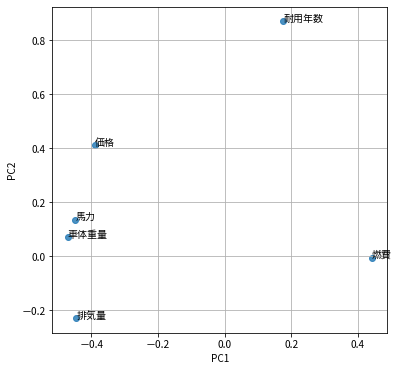

In [11]:
plt.figure(figsize=(6, 6),facecolor="white")
for x, y, name in zip(pca.components_[0], pca.components_[1], dft.columns[:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 主成分得点

In [13]:
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.142985,0.316487,0.563965,0.621923,-0.107073,0.512627
1,2.308117,-1.788248,-0.097113,0.831125,-0.185113,0.223910
2,4.234444,-0.181921,0.321477,0.630839,-0.396676,-0.371411
3,2.967682,0.434696,0.612166,-0.058758,-0.035608,0.054766
4,2.479234,0.413958,0.969837,-0.007246,-0.156007,0.138045


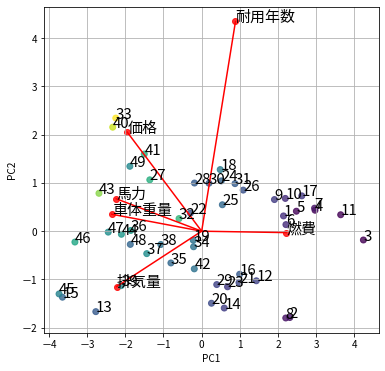

In [26]:
scale = 5 # ベクトルを見やすくするための倍率

plt.figure(figsize=(6, 6),facecolor="white")
for x, y, name in zip(pca.components_[0]*scale, pca.components_[1]*scale, dft.columns[:]):
    plt.text(x, y, name,fontsize=15)
    vec = np.array([[0,x],[0,y]])
    plt.plot(vec[0],vec[1],c="r")
plt.scatter(pca.components_[0]*scale, pca.components_[1]*scale, alpha=0.8,c="r")
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(dfs.iloc[:, 0]))
for i in range(len(feature)):
    plt.text(feature[i, 0],feature[i, 1],str(i+1),fontsize=15)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

第一主成分は固有ベクトルから燃費,車体重量,排気量,馬力の5つの影響が大きい主成分である.価格は第一主成分と第二主成分でほぼ同じ大きさになっている.さらに,第一主成分は燃費が大きいときに大きくなり,車体重量,排気量,馬力が大きくなると小さくなるという特徴がある.これより第一主成分は燃費が良く車体の小さな車を表す尺度であると考えられる.第二主成分は耐用年数が大きな値になっており,耐用年数が長くなると値が大きくなる特徴がある.このことから第二主成分は車の耐用年数を表す尺度であると考察する.